In [1]:
# ============================================
# Bank Marketing Campaign Funnel Analysis
# ============================================

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Upload CSV
from google.colab import files
uploaded = files.upload()  # Select 'bank-additional-full.csv'
# Import zipfile
import zipfile

# Unzip the uploaded file
with zipfile.ZipFile("bank+marketing.zip", 'r') as zip_ref:
    zip_ref.extractall("bank_marketing")  # extracts to folder 'bank_marketing'

# List the files inside to check
import os
print(os.listdir("bank_marketing"))

# Unzip bank-additional.zip from within bank_marketing
with zipfile.ZipFile("bank_marketing/bank-additional.zip", 'r') as zip_ref:
    zip_ref.extractall("bank_marketing") # extracts bank-additional-full.csv to bank_marketing

# List the files inside bank_marketing again to confirm the extracted CSV
print(os.listdir("bank_marketing"))

# Step 2: Load dataset
df = pd.read_csv('bank_marketing/bank-additional/bank-additional-full.csv', sep=';')
df.head()

Saving bank+marketing.zip to bank+marketing.zip
['bank.zip', 'bank-additional.zip']
['bank.zip', '__MACOSX', 'bank-additional', 'bank-additional.zip']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Visitors: 41188
Leads: 5625
Customers: 4640

--- Conversion Rates ---
Visitor → Lead Conversion: 13.66%
Lead → Customer Conversion: 82.49%

--- Drop-offs ---
Visitor → Lead Drop-off: 86.34%
Lead → Customer Drop-off: 17.51%


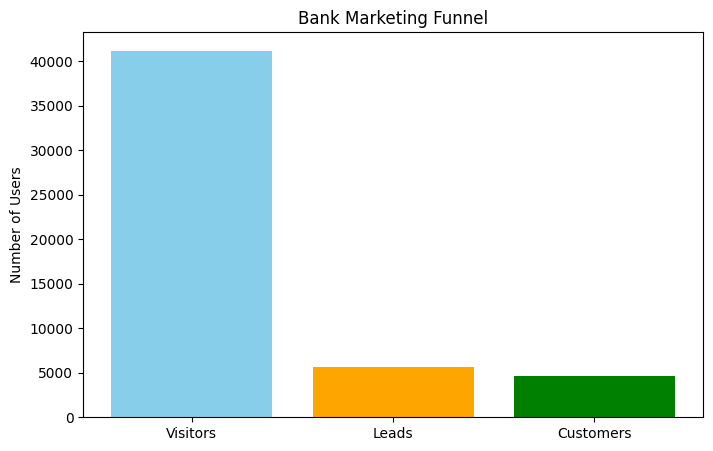

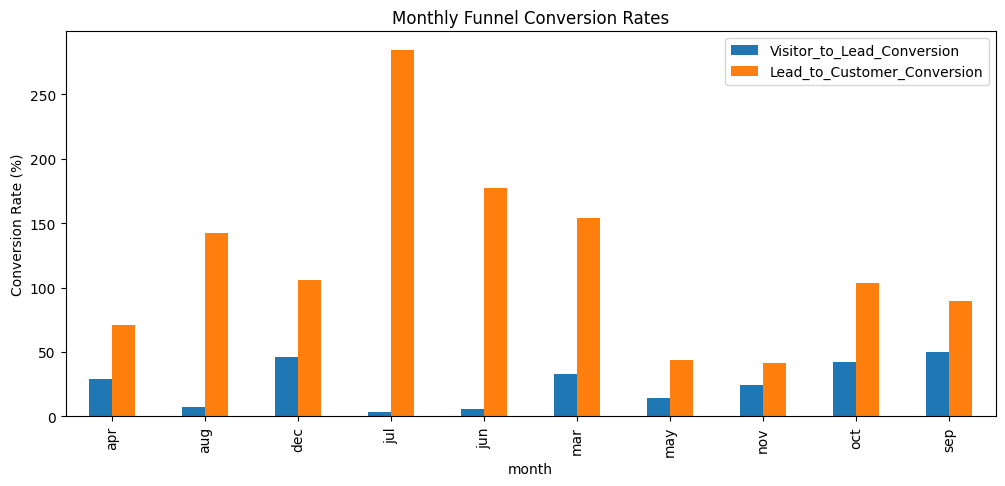

In [2]:
# Step 4: Define funnel stages

visitors = df.shape[0]
leads = df[df['previous'] > 0].shape[0]
customers = df[df['y'] == 'yes'].shape[0]

print(f"Visitors: {visitors}")
print(f"Leads: {leads}")
print(f"Customers: {customers}")

# Step 5: Conversion rates & drop-offs
visitor_to_lead_conversion = (leads / visitors) * 100
lead_to_customer_conversion = (customers / leads) * 100 if leads>0 else 0
visitor_to_lead_dropoff = 100 - visitor_to_lead_conversion
lead_to_customer_dropoff = 100 - lead_to_customer_conversion

print("\n--- Conversion Rates ---")
print(f"Visitor → Lead Conversion: {visitor_to_lead_conversion:.2f}%")
print(f"Lead → Customer Conversion: {lead_to_customer_conversion:.2f}%")
print("\n--- Drop-offs ---")
print(f"Visitor → Lead Drop-off: {visitor_to_lead_dropoff:.2f}%")
print(f"Lead → Customer Drop-off: {lead_to_customer_dropoff:.2f}%")

# Step 6: Funnel visualization
funnel_data = pd.DataFrame({
    'Stage': ['Visitors', 'Leads', 'Customers'],
    'Users': [visitors, leads, customers]
})

plt.figure(figsize=(8,5))
plt.bar(funnel_data['Stage'], funnel_data['Users'], color=['skyblue','orange','green'])
plt.title('Bank Marketing Funnel')
plt.ylabel('Number of Users')
plt.show()

# Step 7: Conversion by month
monthly = df.groupby('month').agg(
    Visitors=('y', 'count'),
    Leads=('previous', lambda x: (x>0).sum()),
    Customers=('y', lambda x: (x=='yes').sum())
).reset_index()

monthly['Visitor_to_Lead_Conversion'] = (monthly['Leads'] / monthly['Visitors'])*100
monthly['Lead_to_Customer_Conversion'] = (monthly['Customers'] / monthly['Leads'])*100

monthly.plot(x='month', y=['Visitor_to_Lead_Conversion','Lead_to_Customer_Conversion'], kind='bar', figsize=(12,5))
plt.title('Monthly Funnel Conversion Rates')
plt.ylabel('Conversion Rate (%)')
plt.show()



**Insights**

1. Major drop-off at Visitor → Lead stage
Only ~13.7% of visitors become leads, indicating weak initial engagement.

2. Strong Lead → Customer conversion
~82.5% of leads convert to customers, showing effective follow-ups and strong offer quality.

3. Monthly performance varies significantly
Some months show much higher conversions, suggesting seasonal or campaign-based effects.

4. Delayed conversions observed
Very high monthly lead-to-customer rates indicate leads often convert after multiple interactions.


**Recommendations**

1. Improve Visitor → Lead conversion
Optimize landing pages, reduce form friction, and strengthen CTAs.

2. Replicate high-performing months
Reuse strategies from months with strong conversions and increase budget during those periods.

3. Strengthen early-stage engagement
Use retargeting and personalized follow-ups to reduce early drop-offs.

4. Track monthly funnel KPIs
Monitor conversion and drop-off rates regularly to guide campaign decisions.